In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def bisection(f, xl0, xr0, true_err_max = 0.0, rel_err_max = 1e-3, i_max = 100, debug = False, plot = False):
    # initial values
    xl = min(xl0, xr0)
    xr = max(xl0, xr0)
    fxl = f(xl)
    fxr = f(xr)
    true_err = np.inf
    rel_err = np.inf
    i = 0
    
    # track values
    xls = []
    xrs = []
    
    # iterate
    while true_err > true_err_max and rel_err > rel_err_max and i < i_max:
        # iteration number
        i += 1
        # find midpoint
        xc = 0.5 * (xl + xr)
        fxc = f(xc)
        # track values
        xls.append(xl)
        xrs.append(xr)
        # update
        if fxc * fxl > 0:
            xl = xc
            fxl = fxc
        else:
            xr = xc
            fxr = fxc
        # compute error measures
        true_err = abs(fxc)
        rel_err = abs(xl / xr - 1)
        # debug if specified
        if debug:
            print('--------------------')
            print(f'Iteration: {i}')
            print(f'Estimate: {xc:.6g}')
            print(f'Delta: {rel_err:.3g}')
    
    # plot if specified
    if plot:
        plt.figure()
        plt.plot(xls, label = 'Function')
        plt.plot(xrs, label = 'Function')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Bounding x-Values')
    
    # return best estimate
    return xc


--------------------
Iteration: 1
Estimate: 0
Delta: 1
--------------------
Iteration: 2
Estimate: 1
Delta: 1
--------------------
Iteration: 3
Estimate: 0.5
Delta: 0.5
--------------------
Iteration: 4
Estimate: 0.75
Delta: 0.333
--------------------
Iteration: 5
Estimate: 0.625
Delta: 0.167
--------------------
Iteration: 6
Estimate: 0.6875
Delta: 0.0833
--------------------
Iteration: 7
Estimate: 0.71875
Delta: 0.0435
--------------------
Iteration: 8
Estimate: 0.703125
Delta: 0.0222
--------------------
Iteration: 9
Estimate: 0.695312
Delta: 0.0112
--------------------
Iteration: 10
Estimate: 0.691406
Delta: 0.00562
--------------------
Iteration: 11
Estimate: 0.693359
Delta: 0.00282
--------------------
Iteration: 12
Estimate: 0.692383
Delta: 0.00141
--------------------
Iteration: 13
Estimate: 0.692871
Delta: 0.000704


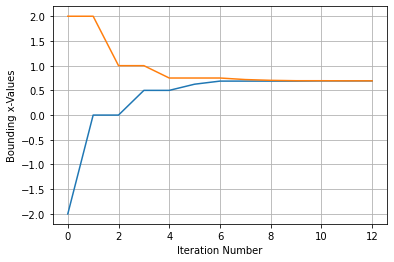

In [14]:
# example usage
f = lambda x: np.exp(x) - 2
root = bisection(f, -2.0, 2.0, debug = True, plot = True)
